<a href="https://colab.research.google.com/github/nanangyudi/2020pds_d/blob/main/HappinessReport_205150409111004_Excel_Anggara_Projek_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deskripsi Tujuan Analisis**

---

Untuk mengetahui faktor utama yang mempengaruhi Happiness Score dari Analisa kebahagiaan di dunia berdasarkan hasil publikasi tahunan Jaringan Solusi Pembangunan Berkelanjutan PBB.



**Pendekatan yang Dilakukan**

---

Pendekatan dilakukan dengan Analityc Aproach dengan memanfaatkan prediktif model dengan menggunakan Linear Regression, hal ini dikarenakan untuk menjawab pertanyaan penelitian perlu untuk menunjukkan hubungan antar pengaruh nilai kolom yang satu dengan yang lain.



**Pengumpulan Data**

---
Data diambil dari : https://www.kaggle.com/unsdsn/world-happiness

Dari link tersebut dapat ditemukan 5 pilihan file csv yang dinamakan berdasarkan tahun penelitian yang dapat di analisa, penulis memilih dataset tahun 2016 karena masih terdapat penggolongan berdasarkan Region, sehingga dataset dapat diteliti lebih jauh.



**Pemahaman Terhadap Data**

---
Data yang digunakan dalam dataset ini adalah berdasar pada Gallup World Poll, Data tersebut didasarkan pada jawaban atas pertanyaan evaluasi kehidupan yang diajukan dalam jajak pendapat. Pertanyaan ini, yang dikenal sebagai tangga Cantril, meminta responden untuk memikirkan tangga dengan kehidupan terbaik bagi mereka menjadi 10 dan kemungkinan terburuk adalah hidup 0 dan menilai kehidupan mereka sendiri pada skala itu. Skor tersebut berasal dari sampel perwakilan nasional untuk tahun 2013-2016 dan menggunakan bobot Gallup untuk membuat estimasi representatif. Kolom-kolom setelah skor kebahagiaan memperkirakan sejauh mana masing-masing dari enam faktor - produksi ekonomi, dukungan sosial, harapan hidup, kebebasan, tidak adanya korupsi, dan kemurahan hati.


1. Pertama tama Import Library yang diperlukan dalam eksporasi data

In [ ]:
import numpy as np  #numpy untuk eksplorasi terkait  array
import pandas as pd #pandas untuk eksplorasi terkait dataframe
import matplotlib.pyplot as plt #matplot untuk eksplorasi terkait visualisasi data
import seaborn as sns #seaborn untuk eksplorasi terkait visualisasi data yang dibangun di atas matplotlib
from sklearn.model_selection import train_test_split #train_test_split untuk memisahkan dataset training dan dataset testing
from sklearn.linear_model import LinearRegression #LinearRegression untuk perhitungan prediksi data test
url = 'https://raw.githubusercontent.com/exceleapp/PengantarDataSaintis/main/2016.csv' #variabel url yang berisi link dataset yang digunakan

2. Selanjutnya Tampilkan isi dari dataset yang ada dalam variabel url

In [ ]:
df = pd.read_csv(url)
df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


3. Selanjutnya cek Dimensi dan Kolom dari dataset 

In [ ]:
df.shape

(157, 13)

In [ ]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

4. Selanjutnya cek data kosong atau null yang dapat mengganggu proses analisa data

In [ ]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

5. Terlihat tidak ada kolom yang kosong atau null, selain dengan cara diatas jumlah kolom kosong dapat dilihat dengan code seperti berikut

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [ ]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


**Persiapan data atau eksplorasi data**

---

1. Langkah pertama yang perlu dilakukan adalah data cleansing

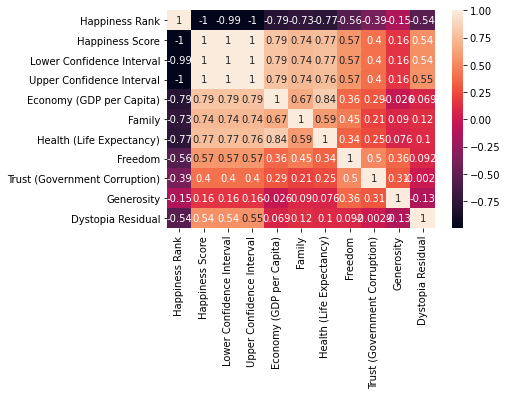

In [ ]:
sns.heatmap(df.corr(), annot=True)

2. Terlihat pada uji corelasi diatas bahwa kolom Lower Confidence Level, Upper Confidence dan Dystopia Residual menampilkan nilai serupa dengan Happiness Score sehingga menimbulkan data ganda yang tidak diperlukan, maka dari itu penulis memilih untuk menghapus ketiga kolom tersebut.

In [ ]:
df.drop(['Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'], axis=1, inplace=True)
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180
153,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268
154,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517
155,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397


Tampak nilai korelasi berbeda setelah kedua kolom sebelumnya dihapus

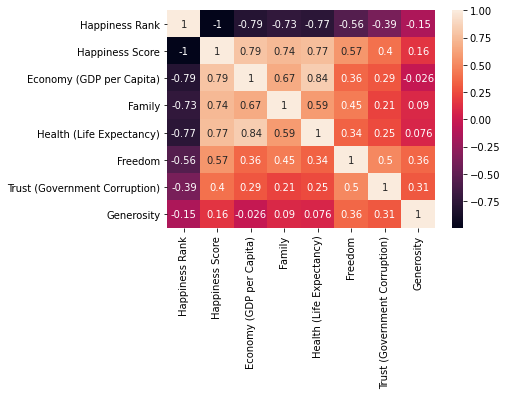

In [ ]:
sns.heatmap(df.corr(), annot=True)

**Permodelan Data**

---


In [ ]:
df[['Region','Country']].groupby(['Region'])['Region'].agg('count')


Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        24
Middle East and Northern Africa    19
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 38
Western Europe                     21
Name: Region, dtype: int64

Berdasarkan Region dapat dilihat bahwa yang berpengaruh besar pada Happiness Score berdasarkan model berikut :

**Region Western Europe**

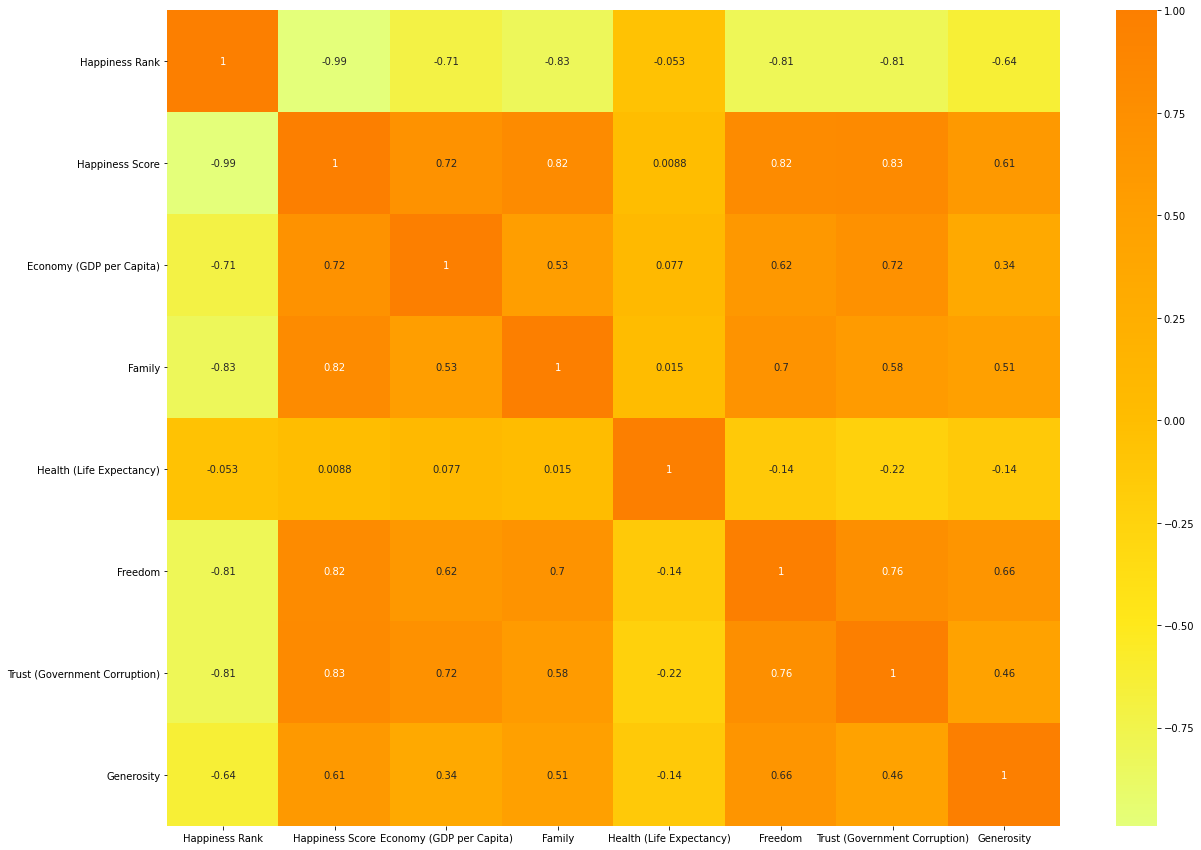

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

d = df.loc[lambda df: df['Region'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'Wistia', annot = True)

plt.show()

Pada Region Western Europe terlihat bahwa yang mempengaruhi Happiness Score adalah Trust (Government Corruption), Freedom, dan Family

**10 Negara dengan Happiness Score Tertinggi di Western Europe**

In [ ]:
df[(df['Region'] == 'Western Europe')].head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
6,Netherlands,Western Europe,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416
9,Sweden,Western Europe,10,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254
11,Austria,Western Europe,12,7.119,1.45038,1.08383,0.80565,0.54355,0.21348,0.32865
15,Germany,Western Europe,16,6.994,1.44787,1.09774,0.81487,0.53466,0.28551,0.30452
17,Belgium,Western Europe,18,6.929,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240


**Region Eastern Asia** 

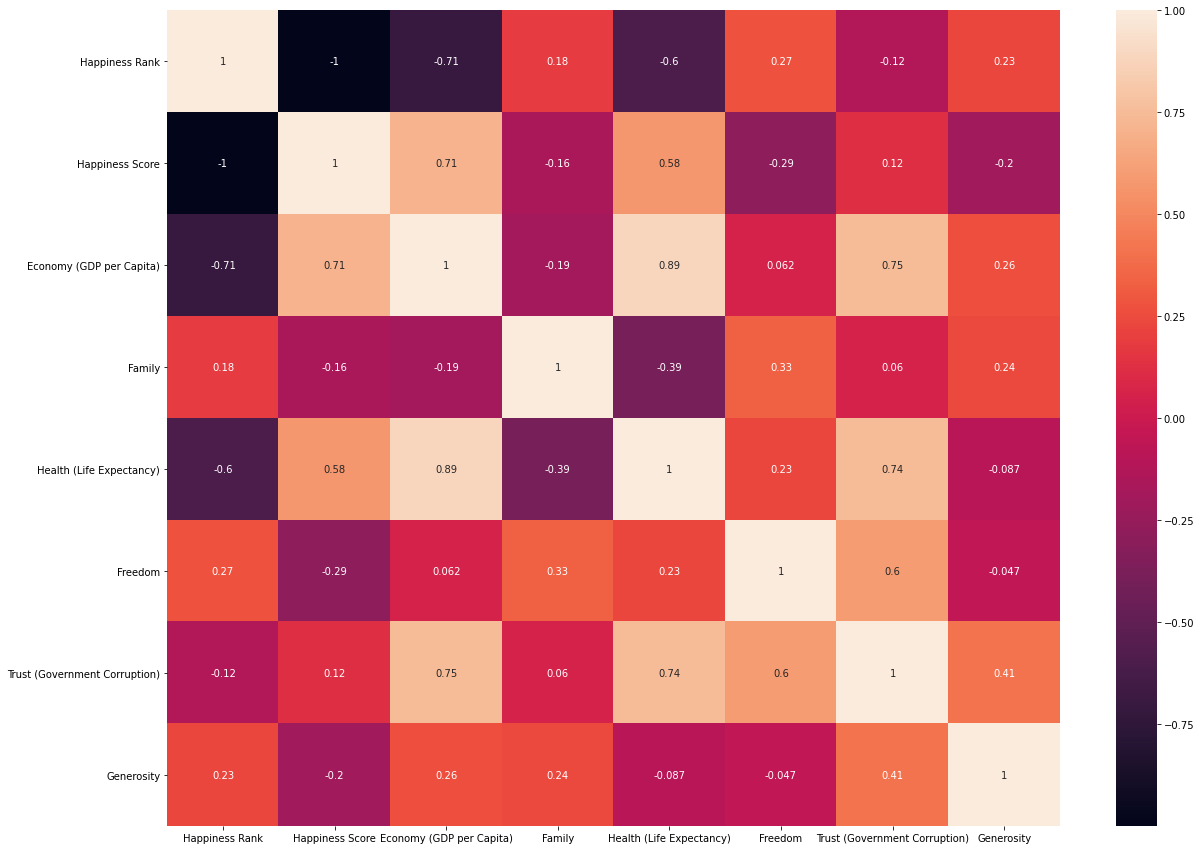

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

d = df.loc[lambda df: df['Region'] == 'Eastern Asia']
sns.heatmap(d.corr(), annot = True)

plt.show()

**10 Negara dengan Happiness Score Tertinggi di Eastern Asia**

In [ ]:
df[(df['Region'] == 'Eastern Asia')].head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
34,Taiwan,Eastern Asia,34,6.379,1.39729,0.92624,0.79565,0.32377,0.06630,0.25495
52,Japan,Eastern Asia,53,5.921,1.38007,1.06054,0.91491,0.46761,0.18985,0.10224
57,South Korea,Eastern Asia,57,5.835,1.35948,0.72194,0.88645,0.25168,0.07716,0.18824
74,Hong Kong,Eastern Asia,75,5.458,1.51070,0.87021,0.95277,0.48079,0.31647,0.40097
82,China,Eastern Asia,83,5.245,1.02780,0.79381,0.73561,0.44012,0.02745,0.04959
100,Mongolia,Eastern Asia,101,4.907,0.98853,1.08983,0.55469,0.35972,0.03285,0.34539


Sedangkan di Region Eastern Asia yang menjadi pengaruh Happiness Score disana adalah Economy (GDP per Capita) dan Health (Life Expectancy)

**Region Southeastern Asia**

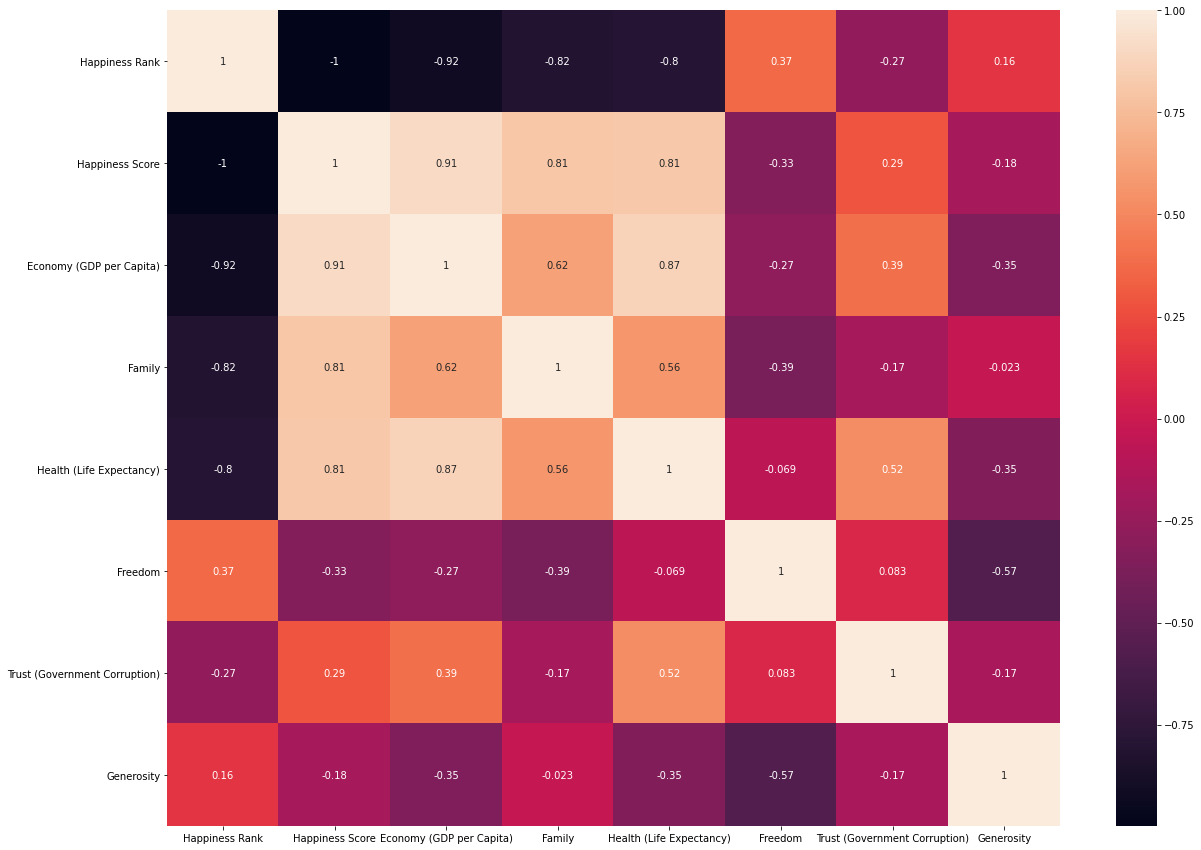

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

d = df.loc[lambda df: df['Region'] == 'Southeastern Asia']
sns.heatmap(d.corr(), annot = True)

plt.show()

Sedangkan di Region Southeastern Asia yang menjadi pengaruh Happiness Score disana adalah Economy (GDP per Capita), Family dan Health (Life Expectancy)

**10 Negara dengan Happiness Score Tertinggi di Southeastern Asia**

In [ ]:
df[(df['Region'] == 'Southeastern Asia')].head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
21,Singapore,Southeastern Asia,22,6.739,1.64555,0.86758,0.94719,0.48770,0.46987,0.32706
32,Thailand,Southeastern Asia,33,6.474,1.08930,1.04477,0.64915,0.49553,0.02833,0.58696
46,Malaysia,Southeastern Asia,47,6.005,1.25142,0.88025,0.62366,0.39031,0.09081,0.41474
78,Indonesia,Southeastern Asia,79,5.314,0.95104,0.87625,0.49374,0.39237,0.00322,0.56521
81,Philippines,Southeastern Asia,82,5.279,0.81217,0.87877,0.47036,0.54854,0.11757,0.21674
95,Vietnam,Southeastern Asia,96,5.061,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075
101,Laos,Southeastern Asia,102,4.876,0.68042,0.54970,0.38291,0.52168,0.22423,0.43079
118,Myanmar,Southeastern Asia,119,4.395,0.34112,0.69981,0.39880,0.42692,0.20243,0.81971
139,Cambodia,Southeastern Asia,140,3.907,0.55604,0.53750,0.42494,0.58852,0.08092,0.40339


**Region Middle East and Northern Africa**

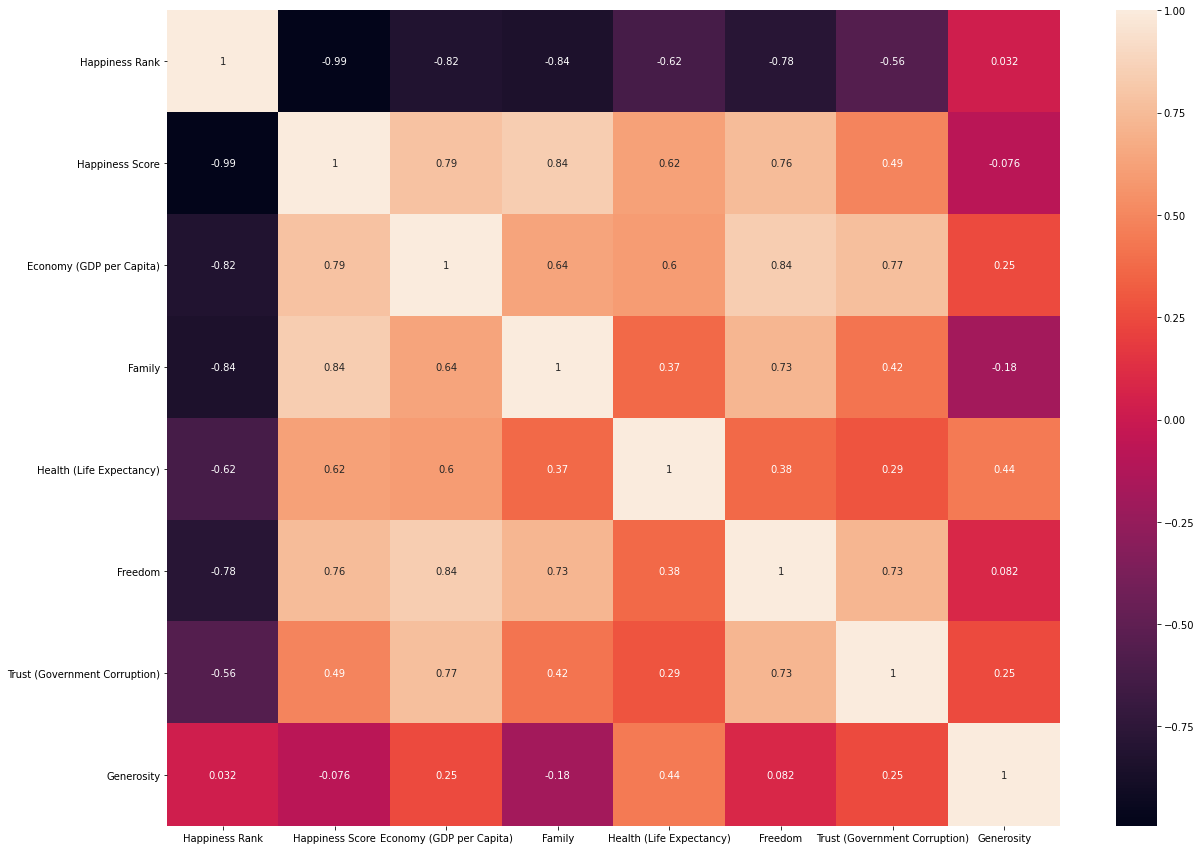

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

d = df.loc[lambda df: df['Region'] == 'Middle East and Northern Africa']
sns.heatmap(d.corr(), annot = True)

plt.show()

Pada Region Middle East and Northern Africa yang paling mempengaruhi Happiness Score adalah Family, Economy (GDP per Capita) dan Freedom

**10 Negara dengan Happiness Score Tertinggi di Middle East and Northern Africa**

In [ ]:
df[(df['Region'] == 'Middle East and Northern Africa')].head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
10,Israel,Middle East and Northern Africa,11,7.267,1.33766,0.99537,0.84917,0.36432,0.08728,0.32288
27,United Arab Emirates,Middle East and Northern Africa,28,6.573,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591
33,Saudi Arabia,Middle East and Northern Africa,34,6.379,1.48953,0.84829,0.59267,0.37904,0.30008,0.15457
35,Qatar,Middle East and Northern Africa,36,6.375,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388
37,Algeria,Middle East and Northern Africa,38,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044
40,Kuwait,Middle East and Northern Africa,41,6.239,1.61714,0.87758,0.63569,0.43166,0.23669,0.15965
41,Bahrain,Middle East and Northern Africa,42,6.218,1.44024,0.94397,0.65696,0.47375,0.25772,0.17147
66,Libya,Middle East and Northern Africa,67,5.615,1.06688,0.95076,0.52304,0.40672,0.10339,0.17087
77,Turkey,Middle East and Northern Africa,78,5.389,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707
79,Jordan,Middle East and Northern Africa,80,5.303,0.99673,0.86216,0.60712,0.36023,0.13297,0.14262


**Region Sub-Saharan Africa**

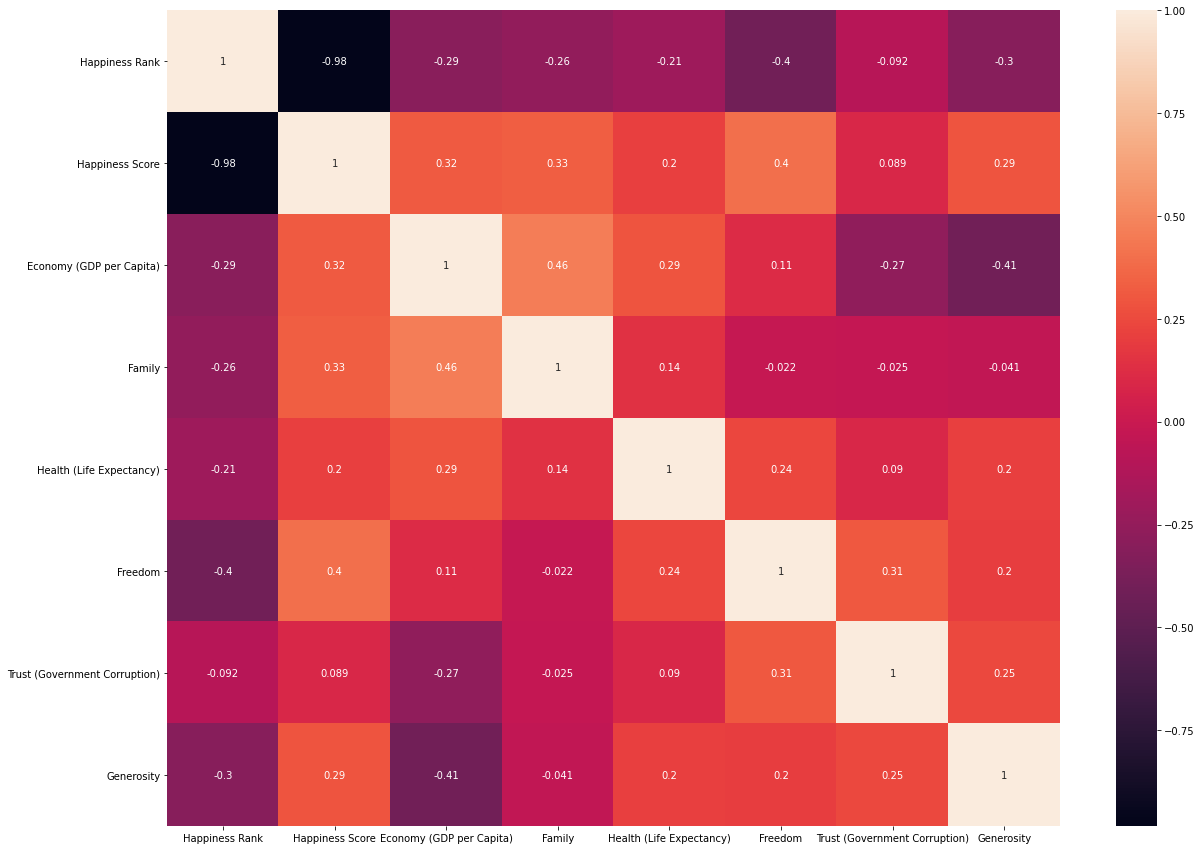

In [ ]:
plt.rcParams['figure.figsize'] = (20, 15)

d = df.loc[lambda df: df['Region'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(), annot = True)

plt.show()

Pada Region Sub-Saharan Africa hal yang paling mempengaruhi Happiness Score adalah Freedom, Economy (GDP per Capita) dan Family 

**10 Negara dengan Happiness Score Tertinggi di Sub-Saharan Africa**

In [ ]:
df[(df['Region'] == 'Sub-Saharan Africa')].head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
65,Mauritius,Sub-Saharan Africa,66,5.648,1.14372,0.75695,0.66189,0.46145,0.05203,0.36951
75,Somalia,Sub-Saharan Africa,76,5.440,0.00000,0.33613,0.11466,0.56778,0.31180,0.27225
96,Somaliland Region,Sub-Saharan Africa,97,5.057,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479
102,Nigeria,Sub-Saharan Africa,103,4.875,0.75216,0.64498,0.05108,0.27854,0.03050,0.23219
105,Zambia,Sub-Saharan Africa,106,4.795,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866
110,Sierra Leone,Sub-Saharan Africa,111,4.635,0.36485,0.62800,0.00000,0.30685,0.08196,0.23897
112,Namibia,Sub-Saharan Africa,113,4.574,0.93287,0.70362,0.34745,0.48614,0.10398,0.07795
113,Cameroon,Sub-Saharan Africa,114,4.513,0.52497,0.62542,0.12698,0.42736,0.06126,0.22680
114,Ethiopia,Sub-Saharan Africa,115,4.508,0.29283,0.37932,0.34578,0.36703,0.17170,0.29522
115,South Africa,Sub-Saharan Africa,116,4.459,1.02416,0.96053,0.18611,0.42483,0.08415,0.13656


**Sehingga dapat disimpulkan bahwa pengaruh Happiness Score pada tiap tiap region adalah berbeda satu sama lain**

Region dengan **Happiness Score Tertinggi** didominasi oleh Region **Western Europe**

In [ ]:
df[['Region', 'Happiness Score']].sort_values(by = 'Happiness Score',
                                                ascending = False).head(10)

,Region,Happiness Score
0,Western Europe,7.526
1,Western Europe,7.509
2,Western Europe,7.501
3,Western Europe,7.498
4,Western Europe,7.413
5,North America,7.404
6,Western Europe,7.339
7,Australia and New Zealand,7.334
8,Australia and New Zealand,7.313
9,Western Europe,7.291


Region dengan **Happiness Score Terendah** didominasi oleh Region **Sub-Saharan Africa**

In [ ]:
df[['Region', 'Happiness Score']].sort_values(by = 'Happiness Score',
                                                ascending = True).head(10)

,Region,Happiness Score
156,Sub-Saharan Africa,2.905
155,Middle East and Northern Africa,3.069
154,Sub-Saharan Africa,3.303
153,Southern Asia,3.360
152,Sub-Saharan Africa,3.484
151,Sub-Saharan Africa,3.515
150,Sub-Saharan Africa,3.607
149,Sub-Saharan Africa,3.622
148,Sub-Saharan Africa,3.666
147,Sub-Saharan Africa,3.695


**Secara keseluruhan data, hal yang paling mempengaruhi Happiness Score adalah Economy (GDP per Capita) dan Health (Life Expectancy)**

Berdarasarkan uji korelasi dengan metode spearman, terlihat bahwa Economy (GDP per Capita) dan Health (Life Expectancy) yang paling mempengaruhi penilaian Happiness Score

In [ ]:
spearman_cormatrix= df.corr(method='spearman')
spearman_cormatrix

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Rank,1.000000,-1.000000,-0.808486,-0.762077,-0.770846,-0.562503,-0.311914,-0.149173
Happiness Score,-1.000000,1.000000,0.808486,0.762077,0.770846,0.562503,0.311914,0.149173
Economy (GDP per Capita),-0.808486,0.808486,1.000000,0.698863,0.856341,0.397277,0.223493,0.000406
Family,-0.762077,0.762077,0.698863,1.000000,0.618060,0.508152,0.177294,0.120647
Health (Life Expectancy),-0.770846,0.770846,0.856341,0.618060,1.000000,0.352924,0.168427,0.080010
Freedom,-0.562503,0.562503,0.397277,0.508152,0.352924,1.000000,0.466232,0.400576
Trust (Government Corruption),-0.311914,0.311914,0.223493,0.177294,0.168427,0.466232,1.000000,0.252983
Generosity,-0.149173,0.149173,0.000406,0.120647,0.080010,0.400576,0.252983,1.000000


Terlihat kecenderungan bahwa **semakin tinggi Economy (GDP per Capita)** maka **semakin baik pula Happiness Rank** yang didapat oleh suatu negara


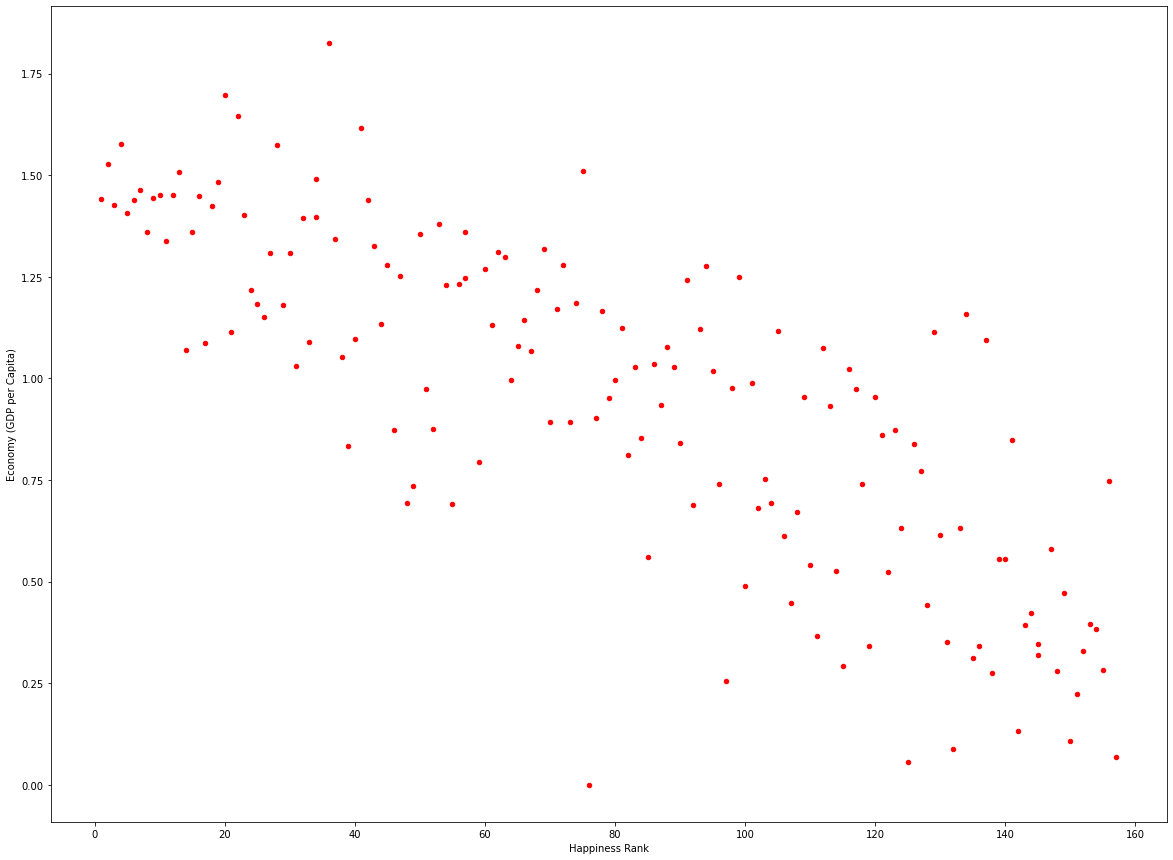

In [ ]:
df.plot(kind = "scatter",x="Happiness Rank",y = "Economy (GDP per Capita)", color = "r")
plt.show()

Sama halnya dengan Economy (GDP per Capita),  **semakin tinggi Health (Life Expectancy)** maka terlihat kecenderungan **semakin baik pula Happiness Rank** yang didapat oleh suatu negara

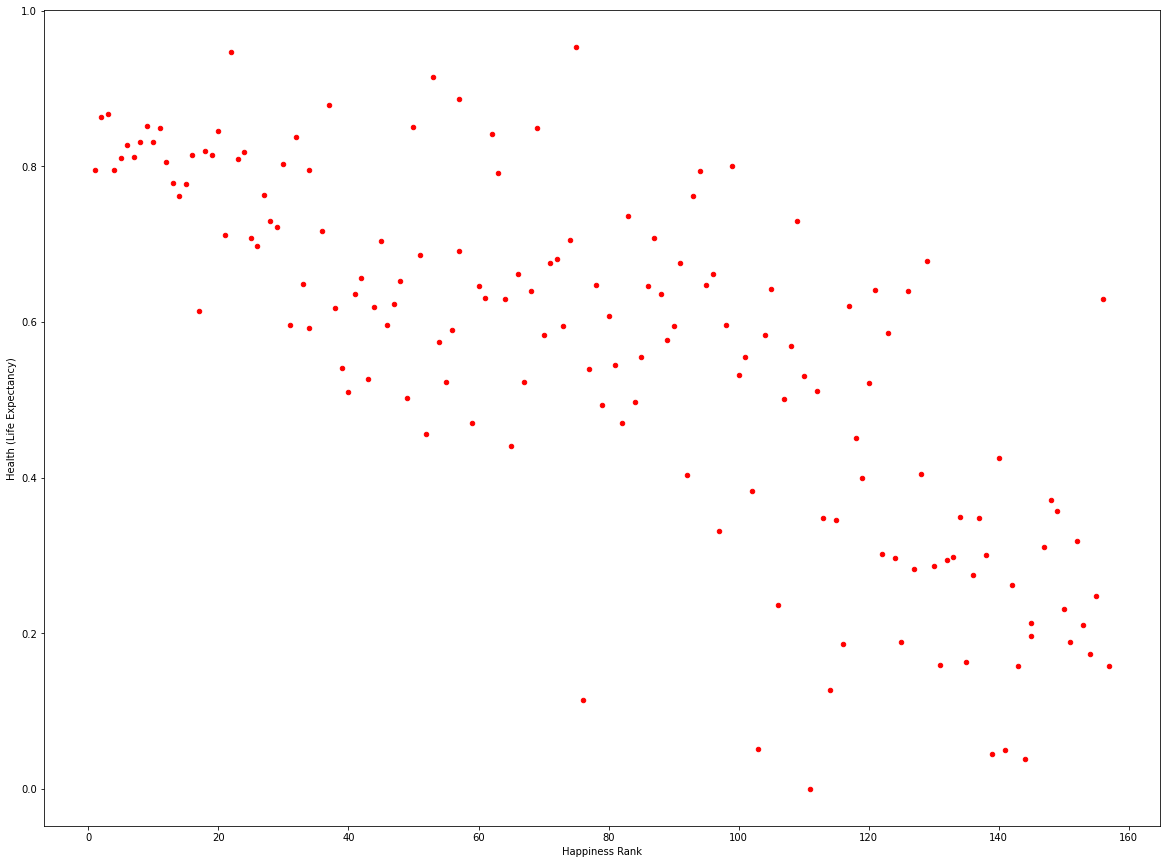

In [ ]:
df.plot(kind = "scatter",x="Happiness Rank",y = "Health (Life Expectancy)", color = "r")
plt.show()

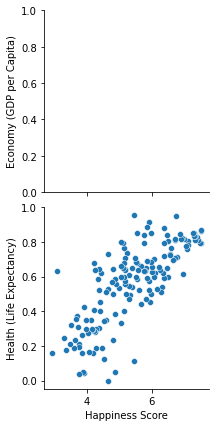

In [ ]:
sns.pairplot(data=df,height=3,x_vars=['Happiness Score'],y_vars=['Economy (GDP per Capita)','Health (Life Expectancy)'])

In [ ]:
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180
153,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268
154,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517
155,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397


**Analisa Regresi Linear untuk prediksi nilai Economy berbanding Happiness Score**

Karena nilai korelasi Economy dengan Happiness Score adalah yang tertinggi yaitu 80% (Berdasarkan metode Spearman), maka penulis memutuskan pengujian model ini.

Penentuan Variabel yang digunakan dalam prediksi nilai Economy banding Happiness Score dimana variabel x mewakili Economy, dan variabel y mewakili Happiness Score

In [ ]:
x = df.iloc[:,4:5].values
y = df.iloc[:,3:4].values

Pada pengujian ini penulis menggunakan 20% data untuk test dan 80% data untuk di training

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Happiness Score')

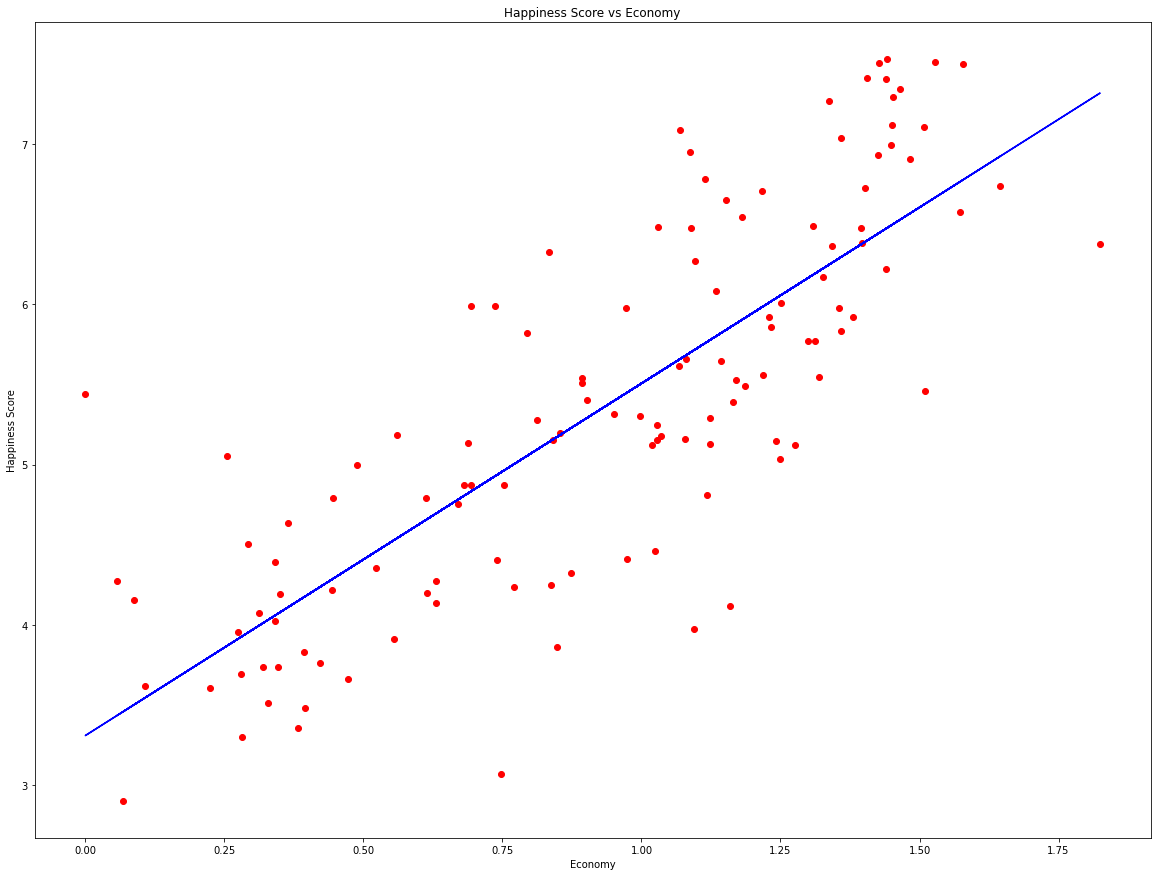

In [ ]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Happiness Score vs Economy')
plt.xlabel('Economy')
plt.ylabel('Happiness Score')

Terlihat kecenderungan bahwa semakin baik nilai Economy maka semakin baik pula Happiness Score yang didapat.

Analisa keakurasian model Economy mempengaruhi Happiness Score adalah 54%

In [ ]:
regressor.score(x_test,y_test)

0.5398924948103577

**Evaluasi Model**

---
1. Dataset **World Happiness Report 2016** mencangkup data dari **157 Negara** dari **10 Region** yang berbeda.
2.Pada Dataset ini terlihat bahwa **Region** dengan **Happiness Score Tertinggi** dipegang oleh **Western Europe** sedangkan yang **Terendah** adalah **Sub-Saharan Africa**.
3. Hal yang paling berpengaruh terhadap Happiness Score tiap Region berbeda antara region satu dengan yang lain.
4. Dalam Dataset ini terbukti bahwa secara mayoritas seluruh negara pada 2016 memiliki **kecenderungan kebahagiaan** berdasarkan **Economy (GDP per Capita)**, jadi semakin Kaya atau Stabil Ekonomi suatu negara maka semakin baik pula Score Kebahagiannya.
5. Teori ini terbukti dari hasil pengujian **Analisa Regresi Linear** yang menunjukkan **nilai akurasi 54%**.